In [1]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df_results = pd.DataFrame()
for f in [f for f in os.listdir('../results/') if 'cnn' in f]:
    df_results = pd.concat((df_results,pd.read_csv(f'../results/{f}')))

df_results.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_results.loc[
    (~df_results['train_synth_ratio'].isna()) & 
    (df_results['transform']=='minimal')
]

,epoch,test_losses,train_losses,test_accuracies,train_accuracies,train_synth_ratio,transform,sim_num,category
0,0,0.855198,0.933524,0.566406,0.547004,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,0,minimal_NonDemented0.8_0.0__VeryMildDemented0....
1,1,0.640924,0.693061,0.730469,0.686069,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,0,minimal_NonDemented0.8_0.0__VeryMildDemented0....
2,2,0.432852,0.347464,0.849219,0.867024,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,0,minimal_NonDemented0.8_0.0__VeryMildDemented0....
3,3,0.258610,0.118585,0.913281,0.958110,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,0,minimal_NonDemented0.8_0.0__VeryMildDemented0....
4,4,0.202875,0.076462,0.948438,0.971749,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,0,minimal_NonDemented0.8_0.0__VeryMildDemented0....
...,...,...,...,...,...,...,...,...,...
295,10,0.199223,0.008692,0.960156,0.997412,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....
296,11,0.196740,0.000345,0.964844,1.000000,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....
297,12,0.191561,0.000068,0.965625,1.000000,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....
298,13,0.197234,0.000045,0.966406,1.000000,NonDemented0.8_0.0__VeryMildDemented0.8_0.0__M...,minimal,19,minimal_NonDemented0.8_0.0__VeryMildDemented0....


<Axes: xlabel='epoch', ylabel='test_losses'>

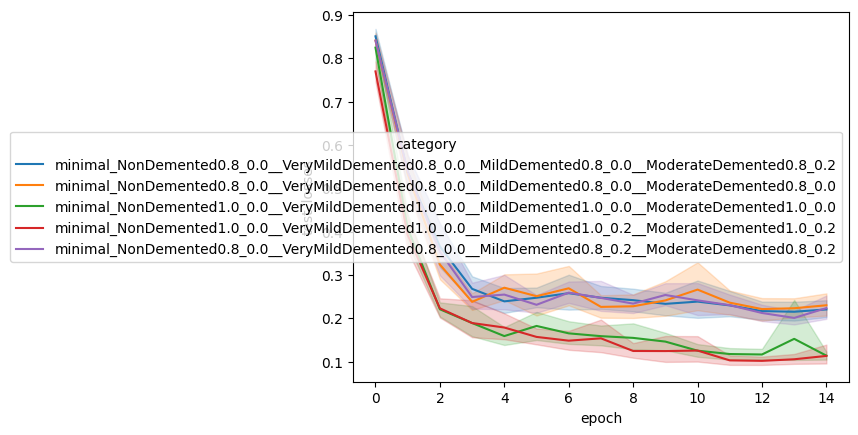

In [4]:
sns.lineplot(
    data=df_results.loc[
        (~df_results['train_synth_ratio'].isna()) & 
        (df_results['transform']=='minimal')],
    x='epoch',
    y='test_losses',
    hue='category'
)

In [40]:
df_results.loc[
    (~df_results['train_synth_ratio'].isna()) & 
    (df_results['transform']=='auto') &
    (df_results['train_synth_ratio']=='NonDemented0.8_0.0__VeryMildDemented0.8_0.0__MildDemented0.8_0.0__ModerateDemented0.8_0.0') &
    (df_results['epoch']>=14),
    ['test_losses']
].median()

test_losses    0.274309
dtype: float64